In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.5.3'

In [3]:
# Configura pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
datos = pd.read_csv('/content/drive/MyDrive/taxis_clean/datos_forecast.csv')

In [5]:
datos.describe()

,total_amount
count,3.650000e+02
mean,2.023930e+06
std,4.222809e+05
min,1.008179e+05
25%,1.741675e+06
50%,2.059307e+06
75%,2.315674e+06
max,2.971901e+06


In [6]:
# Convertir la columna 'fecha' a formato datetime y establecerla como índice
datos['fecha'] = pd.to_datetime(datos['fecha'])

In [7]:
datos.head()

,fecha,total_amount
0,2022-10-01,2210234.76
1,2022-10-02,2011768.02
2,2022-10-03,2124617.91
3,2022-10-04,2143335.78
4,2022-10-05,2223016.74


In [8]:
datos.tail()

,fecha,total_amount
360,2023-09-26,2235424.92
361,2023-09-27,2381662.76
362,2023-09-28,2576115.80
363,2023-09-29,2207327.00
364,2023-09-30,2128822.58


In [9]:
datos = datos.sort_values("fecha").set_index("fecha")

In [10]:
origin, today = "2022-10-1", "2023-09-30"
serie = datos.loc[origin:today]["total_amount"].asfreq("D")

In [11]:
serie.head()

fecha
2022-10-01    2210234.76
2022-10-02    2011768.02
2022-10-03    2124617.91
2022-10-04    2143335.78
2022-10-05    2223016.74
Freq: D, Name: total_amount, dtype: float64

<Axes: xlabel='fecha'>

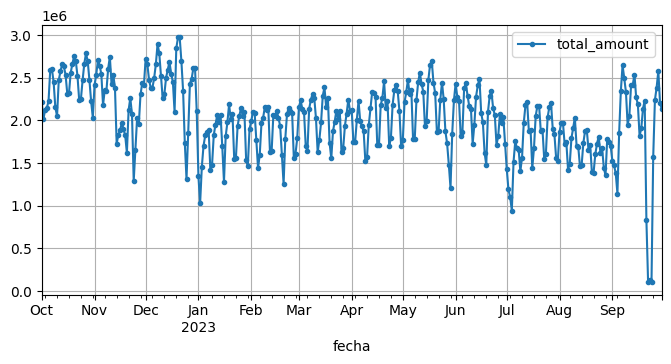

In [12]:
import matplotlib.pyplot as plt

datos["2022-10-1":"2023-09-30"].plot(grid=True, marker=".", figsize=(8, 3.5))

In [13]:
import statsmodels

In [14]:
statsmodels.__version__

'0.14.0'

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(serie,
              order=(1, 0, 0),
              seasonal_order=(0, 1, 1, 7))
model = model.fit()
y_pred = model.forecast()  # returns 427,758.6

In [16]:
y_pred[0].round(2)

1770321.18

In [18]:
origin, start_date, end_date = "2022-10-1", "2022-03-01", "2023-09-30"
time_period = pd.date_range(start_date, end_date)
serie = datos.loc[origin:end_date]["total_amount"].asfreq("D")
y_preds = []
for today in time_period.shift(-1):
    model = ARIMA(serie[origin:today],  # train on data up to "today"
                  order=(1, 0, 0),
                  seasonal_order=(0, 1, 1, 7))
    model = model.fit()  # note that we retrain the model every day!
    y_pred = model.forecast()[0]
    y_preds.append(y_pred)

y_preds = pd.Series(y_preds, index=time_period)
mae = (y_preds - serie[time_period]).abs().mean()

LinAlgError: ignored

In [ ]:
mae

In [ ]:
# extra code – displays the SARIMA forecasts
fig, ax = plt.subplots(figsize=(12, 6))
serie.loc[time_period].plot(label="True", ax=ax, marker=".", grid=True)
ax.plot(y_preds, color="r", marker=".", label="SARIMA Forecasts")
plt.legend()
plt.show()

In [ ]:
y_preds

In [ ]:
nuevos_datos = model.forecast(7).iloc[1:]

In [ ]:
nuevos_datos

In [ ]:
datos_2 = pd.concat([datos, nuevos_datos])

In [ ]:
datos_2.head()

In [ ]:
datos_2.tail()

In [ ]:
model.forecast(7)

In [ ]:
type(model.forecast(7))

In [ ]:
# Supongamos que `model` es tu modelo ARIMA y `model.forecast(7)` es tu serie de predicciones

predicciones = model.forecast(7)

for fecha, predicción in zip(predicciones.index, predicciones):
    print(f"{fecha.date()} : {round(predicción, 2)} USD")


In [ ]:
import joblib

# Guardar el modelo
joblib.dump(model, 'modelo_arima.joblib')


In [ ]:
import joblib

# Cargar el modelo
modelo_cargado = joblib.load('modelo_arima.joblib')

# Ahora puedes usar modelo_cargado para hacer predicciones u otras operaciones.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el error entre las predicciones y los valores reales
error_serie = y_preds - serie[time_period]

# Graficar un histograma de la distribución del error
plt.figure(figsize=(14, 6))
sns.histplot(error_serie, kde=True, color='green')
plt.title('Distribución del Error en el Modelo de Series Temporales (ARIMA)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
